<a href="https://colab.research.google.com/github/zeynepiremkesler/Designing-AI-for-Plant-Image-Detection-and-User-Interface/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data_directory = "/content/drive/MyDrive/dataset"


In [12]:
%cd "/content/drive/MyDrive/dataset"


/content/drive/MyDrive/dataset


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [14]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

batch_size = 32

In [15]:
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 710 images belonging to 4 classes.
Found 176 images belonging to 4 classes.


In [16]:
#CNN Modeli oluşturduk

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [18]:
#Modelimizi compile ettik

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#Modeli eğittim , epochs=10 aldık.

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
23/23 [==============================] - 101s 4s/step - loss: 0.1749 - accuracy: 0.9408 - val_loss: 1.7783 - val_accuracy: 0.6364
Epoch 2/10
23/23 [==============================] - 93s 4s/step - loss: 0.1621 - accuracy: 0.9408 - val_loss: 2.5750 - val_accuracy: 0.6420
Epoch 3/10
23/23 [==============================] - 90s 4s/step - loss: 0.1619 - accuracy: 0.9423 - val_loss: 2.4808 - val_accuracy: 0.7045
Epoch 4/10
23/23 [==============================] - 92s 4s/step - loss: 0.1172 - accuracy: 0.9592 - val_loss: 2.7621 - val_accuracy: 0.7216
Epoch 5/10
23/23 [==============================] - 92s 4s/step - loss: 0.1103 - accuracy: 0.9577 - val_loss: 2.4337 - val_accuracy: 0.6932
Epoch 6/10
23/23 [==============================] - 92s 4s/step - loss: 0.0961 - accuracy: 0.9676 - val_loss: 2.6468 - val_accuracy: 0.6761
Epoch 7/10
23/23 [==============================] - 93s 4s/step - loss: 0.1044 - accuracy: 0.9620 - val_loss: 2.4367 - val_accuracy: 0.6875
Epoch 8/10
23/23 [=

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Eğitim ve doğrulama loss'unun grafiğini çizme
loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
epochs = range(1, len(loss) + 1)

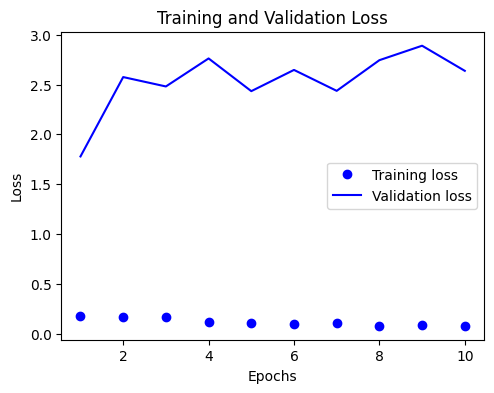

In [25]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [26]:
# Eğitim ve doğrulama accuracy'nin grafiğini çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

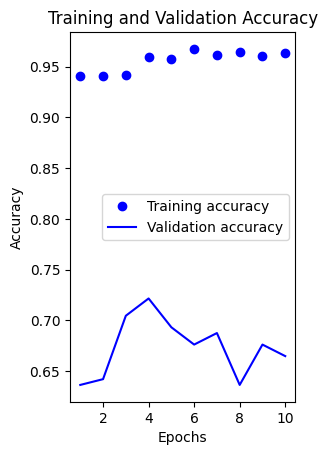

In [27]:
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
# Create the test_generator variable
test_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [31]:
# Now the test_generator variable is defined
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "get_ipython().system('uvicorn main:app --reload')", "get_ipython().system('uvicorn main:app --reload')", 'pip install uvicorn', "get_ipython().system('pip install uvicorn')", "get_ipython().system('uvicorn main:app --reload')", "get_ipython().system('uvicorn detection:app --reload')", "get_ipython().system('uvicorn detection.ipynb:app --reload')", "get_ipython().system('uvicorn content.detection:app --reload')", "#CNN Modeli oluşturduk\n\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(128, (3, 3),

In [32]:
# Veri setinizin bulunduğu dizini belirtin
test_data_directory = "/content/drive/MyDrive/dataset"

# Test veri setini yükleyin ve ön işleme yapın
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # Eğer etiketleriniz kategorik ise bu parametreyi bu şekilde bırakabilirsiniz
)

# Modeli test verisiyle değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Found 886 images belonging to 4 classes.
28/28 [==============================] - 36s 1s/step - loss: 0.5653 - accuracy: 0.9165
Test Loss: 0.5652610063552856, Test Accuracy: 0.9164785742759705


In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Örnek bir görüntüyü model ile tahmin etme
sample_image_path = "/content/drive/MyDrive/dataset1/test/img_8.jpg"
img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Bir batch boyutu ekleyin

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

print(f"Predicted Class: {predicted_class}")



1/1 [==============================] - 0s 176ms/step
Predicted Class: 2


In [ ]:
# Modeli kaydet
model.save('facetracker', save_format='tf')

In [40]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from starlette.middleware.cors import CORSMiddleware
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [41]:
app = FastAPI()

In [42]:
# CORS middleware ile tüm kaynaklara erişime izin ver
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [43]:
# HTML şablonları için Jinja2Templates kullanma
templates = Jinja2Templates(directory="templates")

In [44]:
# Eğitilmiş modeli yükle
model = load_model('/content/drive/MyDrive/models/my_model.h5')

In [46]:
!pip install fastapi

In [59]:
#FastAPI bağlantısı kuruldu
from fastapi import Request


In [55]:
from fastapi import FastAPI, File, UploadFile, HTTPException, Request
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from starlette.middleware.cors import CORSMiddleware
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import io

app = FastAPI()

In [79]:
@app.get("/", response_class=HTMLResponse)
async def read_item(request: Request):
    # Örnek bir görüntü tahmin et
    sample_image_path = "/content/drive/MyDrive/dataset1/test/img_8.jpg"
    predicted_class = predict_image(sample_image_path)

In [81]:
def index(request):
    # ...
    predicted_class = ...
    # ...

    return templates.TemplateResponse("index.html", {"request": request, "predicted_class": predicted_class})

In [82]:

@app.get("/", response_class=HTMLResponse)
async def read_item(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})


In [83]:

@app.post("/predict")
async def create_upload_file(file: UploadFile = File(...)):
    contents = await file.read()
    img = Image.open(io.BytesIO(contents))
    img_array = np.array(img.resize((224, 224))) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Batch boyutunu ekleyin
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    return {"class": predicted_class, "probabilities": predictions[0].tolist()}

In [87]:
!uvicorn detection.ipynb:app --reload


INFO:     Will watch for changes in these directories: ['/content/drive/MyDrive/dataset']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [43835] using WatchFiles
Process SpawnProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/_subprocess.py", line 78, in subprocess_started
    target(sockets=sockets)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 62, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "uvloop/loop.pyx", line 1517, in uvloop.loop.Loop.run_until_complete
  File "/usr/local/lib/python3.10/dist-packages/uvi